# Objetivo:

 - Encontrar o melhor algoritmo  para fazer a previsão do preço do carro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/carros_ml_sem_outliers.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,ano,quilometragem,novo,preco
0,volkswagem,Fox,1.0,2013,100000,0,114900
1,citroen,C3,1.4,2012,71000,0,29990
2,volkswagem,Fox,1.0,2013,84000,0,23990
3,ford,Ka,1.0,2019,10800,0,28990
4,hyundai,Hb20,1.0,2017,23000,0,47879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          10849 non-null  object 
 1   modelo         10849 non-null  object 
 2   motor          10849 non-null  float64
 3   ano            10849 non-null  int64  
 4   quilometragem  10849 non-null  int64  
 5   novo           10849 non-null  int64  
 6   preco          10849 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 593.4+ KB


In [6]:
df.shape

(10849, 7)

In [7]:
df.describe().round(2)

,motor,ano,quilometragem,novo,preco
count,10849.00,10849.00,10849.00,10849.00,10849.00
mean,1.83,2014.58,73593.82,0.19,69110.03
std,0.56,5.11,63857.34,0.40,47199.82
min,1.00,1991.00,0.00,0.00,1000.00
25%,1.50,2011.00,176.00,0.00,32000.00
50%,1.80,2015.00,70100.00,0.00,54888.00
75%,2.20,2019.00,119200.00,0.00,91990.00
max,6.70,2021.00,250000.00,1.00,200000.00


In [8]:
df.corr().round(4)

,motor,ano,quilometragem,novo,preco
motor,1.0000,-0.1049,0.0558,0.0040,0.3190
ano,-0.1049,1.0000,-0.6235,0.5381,0.4764
quilometragem,0.0558,-0.6235,1.0000,-0.5668,-0.3338
novo,0.0040,0.5381,-0.5668,1.0000,0.4365
preco,0.3190,0.4764,-0.3338,0.4365,1.0000


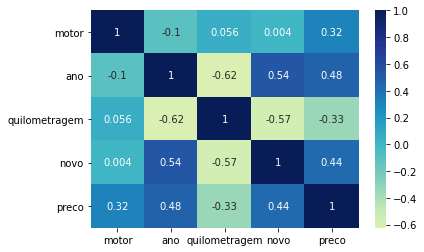

In [9]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

 - Definindo as amostras de treino e teste

In [10]:
df.head()

,marca,modelo,motor,ano,quilometragem,novo,preco
0,volkswagem,Fox,1.0,2013,100000,0,114900
1,citroen,C3,1.4,2012,71000,0,29990
2,volkswagem,Fox,1.0,2013,84000,0,23990
3,ford,Ka,1.0,2019,10800,0,28990
4,hyundai,Hb20,1.0,2017,23000,0,47879


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enconder = LabelEncoder()

In [13]:
df['marca'] = enconder.fit_transform(df['marca'])
df['modelo'] = enconder.fit_transform(df['modelo'])

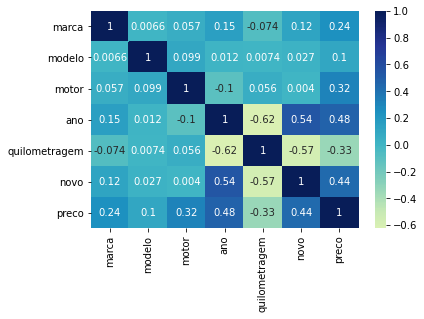

In [14]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          10849 non-null  int32  
 1   modelo         10849 non-null  int32  
 2   motor          10849 non-null  float64
 3   ano            10849 non-null  int64  
 4   quilometragem  10849 non-null  int64  
 5   novo           10849 non-null  int64  
 6   preco          10849 non-null  int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 508.7 KB


In [16]:
df.head()

,marca,modelo,motor,ano,quilometragem,novo,preco
0,23,97,1.0,2013,100000,0,114900
1,6,40,1.4,2012,71000,0,29990
2,23,97,1.0,2013,84000,0,23990
3,9,133,1.0,2019,10800,0,28990
4,11,112,1.0,2017,23000,0,47879


In [17]:
dados = df

In [18]:
X = dados[['novo','ano','motor', 'marca']]
Y = dados['preco']

In [19]:
from sklearn.model_selection import train_test_split

In [25]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

 - Modelo "Baseline" (Ponto de partida)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.420009528045326

 - Machine learning

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.6433093119134938
Test score 0.48233196103121345
Treinando RandomForestRegressor
Train score 0.6373674782422776
Test score 0.5140354486671135
Treinando MLPRegressor


C:\Users\Biena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score 0.02674773445968237
Test score 0.023728060466643996
Treinando XGBRegressor
Train score 0.6277719887087148
Test score 0.52887230454374


In [29]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.6433093119134938
Validation score [0.41698516 0.50709648 0.44858293 0.43859928 0.44472927]
Test score 0.48637151867979356
Treinando RandomForestRegressor
Train score 0.6372413279907365
Validation score [0.46234708 0.53846059 0.49229438 0.48439499 0.49009042]
Test score 0.5146683788868498
Treinando MLPRegressor
Train score 0.021800864762120398
Validation score [0.02213572 0.02286954 0.01777378 0.01675915 0.0199459 ]
Test score 0.0190628852534529
Treinando XGBRegressor
Train score 0.6277719887087148
Validation score [0.4786126  0.55853144 0.49857979 0.4970098  0.49263784]
Test score 0.52887230454374


In [30]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [31]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [32]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=250)

In [33]:
xgb.fit(X_treino, Y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.5648031547647805
Validation score [0.52808204 0.54309542 0.5149725 ]
Test score 0.5419343899402012


 - Calculando o erro

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [36]:
y_pred = xgb.predict(X_teste)

In [37]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 22253.1148
MSE = 1012066326.0558
RMSE = 31812.9899
R2 = 0.5419
